# Implement Low Pass Filter in Python

This is an example of how to use Butterworth band-pass filters in python.

Source: DelftStack

URL: https://www.delftstack.com/howto/python/low-pass-filter-python/#:~:text=Use%20Scipy%20to%20Create%20a%20Low-Pass%20Butterworth%20Filter,that%20carry%20out%20signal%20processing%2C%20optimization%2C%20and%20statistics.

Terminology:
- fs: sampling rate
- nyq: nyquist frequency
- cutoff: lowest frequency

In [1]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

In [2]:
def butter_lowpass(cutoff, fs, order=5):
    """
    The lowpass filter seems to allow to pass all frecuencies below the cutoff frequency. I need a bandpass
    filter
    """
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return b, a

In [3]:
def butter_bandpass(low_cutoff, high_cutoff, fs, order=5):
    """
    The bandpass filter seems to allow to pass all frecuencies between the cutoff low and high frequencies.
    """
    nyq = 0.5*fs
    low_cut = low_cutoff/nyq
    high_cut = high_cutoff/nyq
    b, a = butter(order, [low_cut, high_cut], btype="band", analog=False)
    return b, a

In [4]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [13]:
def butter_bandpass_filter(data, low, high, fs, order=5):
    b, a = butter_bandpass(low, high, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [5]:
# Setting standard filter requirements.
order = 6
fs = 30.0       
cutoff = 3.667 
h_cutoff= 10

In [6]:
bp, ap = butter_bandpass(cutoff, h_cutoff, fs, order)
b, a = butter_lowpass(cutoff, fs, order)

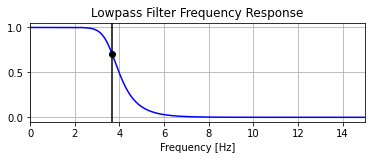

In [7]:
# Plotting the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

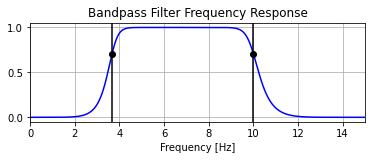

In [8]:
# Plotting the frequency response.
w, h = freqz(bp, ap, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.plot(h_cutoff, 0.5*np.sqrt(2), "ko")
plt.axvline(cutoff, color='k')
plt.axvline(h_cutoff, color="k")
plt.xlim(0, 0.5*fs)
plt.title("Bandpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [9]:
# Creating the data for filteration
T = 5.0         # value taken in seconds
n = int(T * fs) # indicates total samples
t = np.linspace(0, T, n, endpoint=False)

In [10]:
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

In [14]:
# Filtering and plotting
y = butter_lowpass_filter(data, cutoff, fs, order)
y_band = butter_bandpass_filter(data, cutoff, h_cutoff, fs, order)

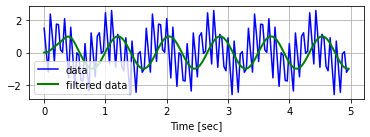

In [12]:
plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()
plt.subplots_adjust(hspace=0.35)

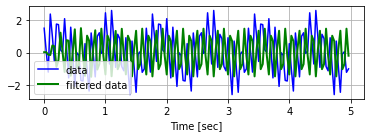

In [16]:
plt.subplot(2, 1, 2)
plt.plot(t, data, "b-", label="data")
plt.plot(t, y_band, "g-", linewidth=2, label="filtered data")
plt.xlabel("Time [sec]")
plt.grid()
plt.legend()
plt.subplots_adjust(hspace=0.35)